### GSI summer student program 

Started this notebook on 09/08/2024. First goal is to perform a balistic correction on the energies measured by the 16 strip detector, in order to do it I extracted data from the go4 histogram to perform a quadratic fit on energies vs. strip position for each strip.

In [2]:
# importing the useful packages
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize

# defining directories 
work_dir = os.getcwd()
data_dir = os.path.join(work_dir, "Uncalib_position")


print("work dir is %s" % work_dir)
print("data dir is %s" % data_dir)

work dir is d:\GSI\SHIP
data dir is d:\GSI\SHIP\Uncalib_position


In [3]:
# reading data
filename = "E vs Calib Postion top 14.hdat"
strip_number = "14"
filepath = os.path.join(data_dir, filename)

my_df = pd.read_csv(filepath, sep="\t", header=1) 
my_df.columns

Index(['# X ', 'Y ', 'Z ', 'Content'], dtype='object')

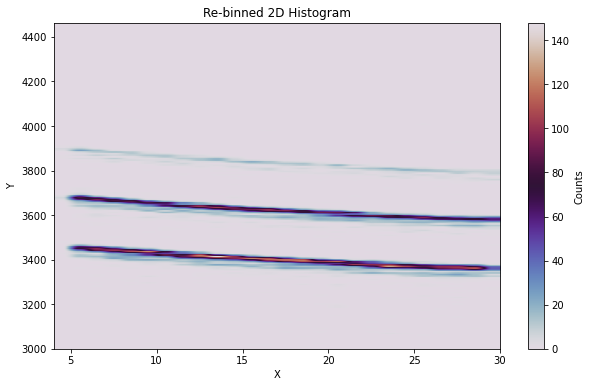

X: 5.5, Y: 3413.58
X: 5.5, Y: 3420.8999999999996
X: 5.5, Y: 3435.54
X: 5.5, Y: 3442.8599999999997
X: 5.5, Y: 3450.1800000000003
X: 5.5, Y: 3457.5
X: 5.5, Y: 3464.8199999999997
X: 5.5, Y: 3640.5
X: 5.5, Y: 3655.1400000000003
X: 5.5, Y: 3662.46
X: 5.5, Y: 3669.7799999999997
X: 5.5, Y: 3677.1000000000004
X: 5.5, Y: 3684.42
X: 5.5, Y: 3889.38
X: 5.5, Y: 3896.7
X: 6.5, Y: 3413.58
X: 6.5, Y: 3435.54
X: 6.5, Y: 3442.8599999999997
X: 6.5, Y: 3450.1800000000003
X: 6.5, Y: 3457.5
X: 6.5, Y: 3633.1800000000003
X: 6.5, Y: 3640.5
X: 6.5, Y: 3655.1400000000003
X: 6.5, Y: 3662.46
X: 6.5, Y: 3669.7799999999997
X: 6.5, Y: 3677.1000000000004
X: 6.5, Y: 3684.42
X: 6.5, Y: 3882.0600000000004
X: 6.5, Y: 3889.38
X: 7.5, Y: 3406.26
X: 7.5, Y: 3413.58
X: 7.5, Y: 3420.8999999999996
X: 7.5, Y: 3428.2200000000003
X: 7.5, Y: 3435.54
X: 7.5, Y: 3442.8599999999997
X: 7.5, Y: 3450.1800000000003
X: 7.5, Y: 3457.5
X: 7.5, Y: 3633.1800000000003
X: 7.5, Y: 3640.5
X: 7.5, Y: 3655.1400000000003
X: 7.5, Y: 3662.46
X: 7.5, 

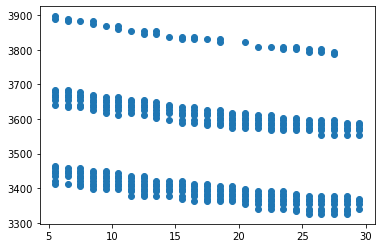

In [4]:

# Extract x, y, and counts
position = my_df["# X "].to_numpy()
energy = my_df["Y "].to_numpy()
content = my_df['Content'].to_numpy()

# selecting only the relevant bins
index = np.where(content!=0)
selected_energy = energy[index]
selected_position = position[index]
selected_content = content[index]

# Determine the number of unique bins in x and y
x_bins = np.unique(selected_position)
y_bins = np.unique(selected_energy)

# Original number of bins
original_x_bins = len(x_bins)
original_y_bins = len(y_bins)

# Define the desired number of bins
new_x_bins = 26  # Modify as needed
new_y_bins = 200  # Modify as needed

# Calculate the new bin edges
x_edges = np.linspace(x_bins.min(), x_bins.max(), new_x_bins + 1)
y_edges = np.linspace(y_bins.min(), y_bins.max(), new_y_bins + 1)

# Re-bin the counts
counts_2d, _, _ = np.histogram2d(selected_position, selected_energy, bins=[x_edges, y_edges], weights=selected_content)

# Plot the re-binned 2D histogram using imshow
plt.figure(figsize=(10,6))
plt.imshow(counts_2d.T, origin='lower', extent=[x_bins.min(), x_bins.max(), y_bins.min(), y_bins.max()], aspect='auto', cmap='twilight')
plt.colorbar(label='Counts')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Re-binned 2D Histogram')
plt.show()

indices = np.where(counts_2d > 10)

# Extract the bin edges corresponding to these indices
x_coords = (x_edges[indices[0]] + x_edges[indices[0] + 1]) / 2
y_coords = (y_edges[indices[1]] + y_edges[indices[1] + 1]) / 2

xx = []
yy = []

# Print or store the coordinates
for x, y in zip(x_coords, y_coords):
    print(f"X: {x}, Y: {y}")
    xx.append(x)
    yy.append(y)

yy = np.array(yy)
xx = np.array(xx)

plt.scatter(xx,yy)


[3413.58 3420.9  3435.54 3442.86 3450.18 3457.5  3464.82 3413.58 3435.54
 3442.86 3450.18 3457.5  3406.26 3413.58 3420.9  3428.22 3435.54 3442.86
 3450.18 3457.5  3398.94 3406.26 3413.58 3420.9  3428.22 3435.54 3442.86
 3450.18 3398.94 3406.26 3413.58 3420.9  3428.22 3435.54 3442.86 3450.18
 3398.94 3406.26 3413.58 3420.9  3428.22 3435.54 3442.86 3376.98 3391.62
 3398.94 3406.26 3413.58 3420.9  3428.22 3435.54 3376.98 3384.3  3391.62
 3398.94 3406.26 3413.58 3420.9  3428.22 3435.54 3376.98 3391.62 3398.94
 3406.26 3413.58 3420.9  3376.98 3391.62 3398.94 3406.26 3413.58 3420.9
 3369.66 3376.98 3391.62 3398.94 3406.26 3413.58 3420.9  3362.34 3376.98
 3384.3  3391.62 3398.94 3406.26 3413.58 3362.34 3369.66 3376.98 3384.3
 3391.62 3398.94 3406.26 3413.58 3362.34 3369.66 3376.98 3384.3  3391.62
 3398.94 3406.26 3362.34 3369.66 3376.98 3384.3  3391.62 3398.94 3406.26
 3355.02 3362.34 3369.66 3376.98 3384.3  3391.62 3398.94 3340.38 3355.02
 3362.34 3369.66 3376.98 3384.3  3391.62 3340.38 3347

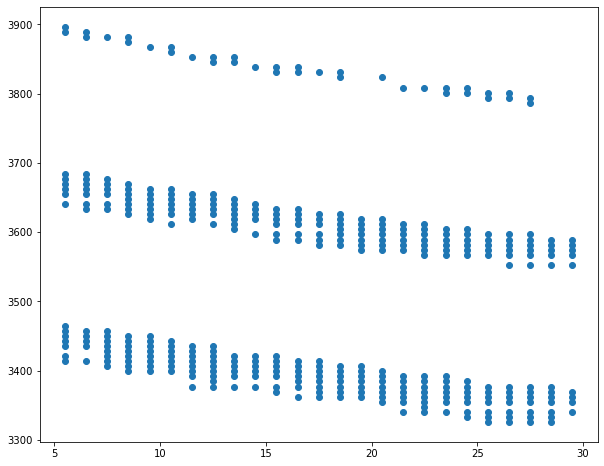

In [5]:

yy = np.array(yy)
xx = np.array(xx)

fig3=plt.figure(figsize=(10,8))
plt.scatter(xx,yy, label='Data')

cond1 = yy<3500 # condition for first curve
cond2_a = yy>3500 # condition for second curve
cond2_b = yy<3700 # condition for second curve
cond3 = yy>3700 # condition for third curve

# first curve
index1 = np.where(cond1)
yy1 = yy[index1]
xx1 = xx[index1]
print(yy1)

# second curve
index2 = np.where(np.logical_and(cond2_a, cond2_b))
yy2 = yy[index2]
xx2 = xx[index2]

# third curve
index3 = np.where(cond3)
yy3 = yy[index3]
xx3 = xx[index3]

a1 = 0.0566533024749073 +/- 0.02888881204017223
b1 = -5.944956348188529 +/- 1.0182582877988613
c1 = 3473.476622137168 +/- 8.001640156850787
a2 = 0.08032671959909266 +/- 0.026066654244618445
b2 = -6.751937484603425 +/- 0.9158836998820873
c2 = 3700.9964803902717 +/- 7.1671472923755
a3 = 0.08177085504742554 +/- 0.017804024804589327
b3 = -7.211479400165057 +/- 0.6036222121510928
c3 = 3929.9578614515985 +/- 4.496743233548345


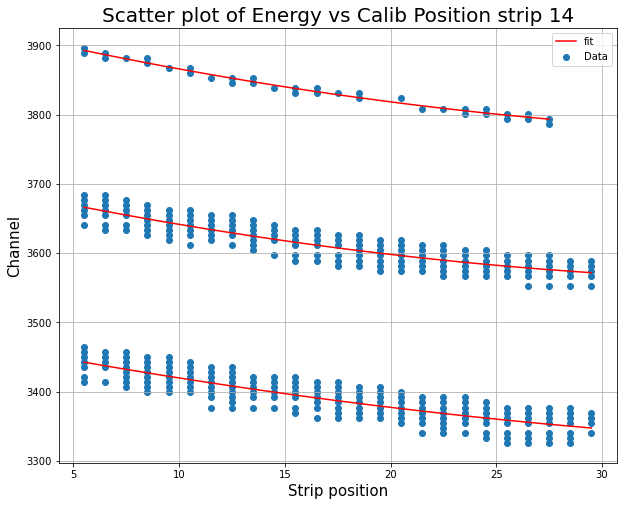

In [6]:
# trying to fit all three


popt, pcov = optimize.curve_fit(parabola, xx1, yy1)
print("a1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("b1 =", popt[1], "+/-", pcov[1,1]**0.5)
print("c1 =", popt[2], "+/-", pcov[2,2]**0.5)


popt2, pcov2 = optimize.curve_fit(parabola, xx2, yy2)
print("a2 =", popt2[0], "+/-", pcov2[0,0]**0.5)
print("b2 =", popt2[1], "+/-", pcov2[1,1]**0.5)
print("c2 =", popt2[2], "+/-", pcov2[2,2]**0.5)


popt3, pcov3 = optimize.curve_fit(parabola, xx3, yy3)
print("a3 =", popt3[0], "+/-", pcov3[0,0]**0.5)
print("b3 =", popt3[1], "+/-", pcov3[1,1]**0.5)
print("c3 =", popt3[2], "+/-", pcov3[2,2]**0.5)

# Plotting the fit for the first curve

fig3=plt.figure(figsize=(10,8))
plt.scatter(xx,yy, label='Data')
plt.plot(xx1, parabola(xx1, *popt), "r-", label='fit')

plt.xlabel("Strip position", fontsize=15)
plt.ylabel("Channel", fontsize=15)
plt.title("Scatter plot of Energy vs Calib Position strip %s" % strip_number, fontsize=20)

# plotting the fit for the second curve
plt.plot(xx2, parabola(xx2, *popt2), "r-")

# plotting the fit for the third curve
plt.plot(xx3, parabola(xx3, *popt3), "r-")
plt.legend()
plt.grid(True)


In [7]:
# Writing fit results in text file

output_name = 'prova_fit_results'
results_dir = os.path.join(work_dir, 'results')
output_filename = os.path.join(results_dir, output_name)

text=open(output_filename+strip_number+".dat", "w")

print("# Strip %s fit results" % strip_number, '\n', file=text)
print(popt[0], popt[1], popt[2] - np.min(yy1), file=text)
print(popt2[0], popt2[1], popt2[2] - np.min(yy2), file=text)
print(popt3[0], popt3[1], popt3[2] - np.min(yy3), file=text)

text.close()

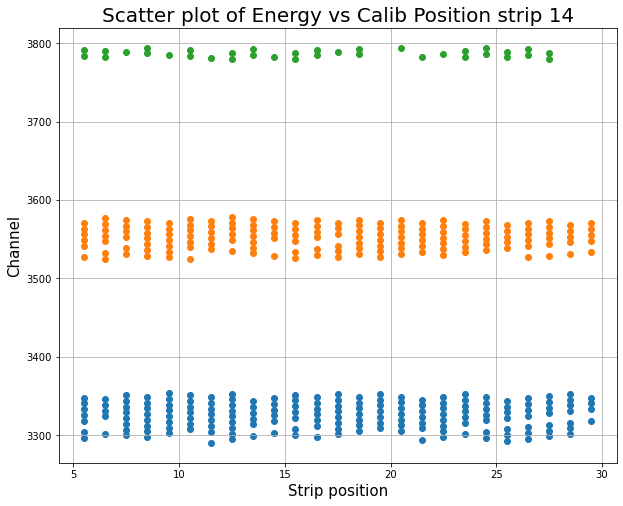

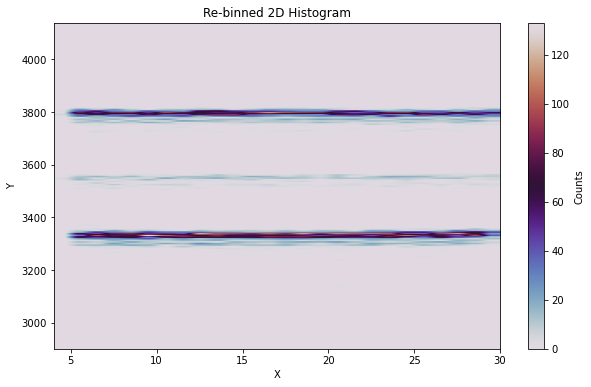

In [8]:
# Plotting the result of the calibration for the first curve

fig3=plt.figure(figsize=(10,8))
plt.scatter(xx1, yy1-parabola(xx1, *popt) + np.min(yy1), label='fit')

plt.xlabel("Strip position", fontsize=15)
plt.ylabel("Channel", fontsize=15)
plt.title("Scatter plot of Energy vs Calib Position strip %s" % strip_number, fontsize=20)

# plotting the fit for the second curve
plt.scatter(xx2, yy2-parabola(xx2, *popt2)+np.min(yy2))

# plotting the fit for the third curve
plt.scatter(xx3, yy3-parabola(xx3, *popt3)+np.min(yy3))
plt.grid(True)


for jj in range(len(selected_energy)-1):
    if selected_energy[jj]<3500:
        selected_energy[jj] = selected_energy[jj] - parabola(selected_position[jj], *popt) + np.min(yy1)
    elif selected_energy[jj]>3700:
        selected_energy[jj] = selected_energy[jj] - parabola(selected_position[jj], *popt3) + np.min(yy2)
    else:
        selected_energy[jj] = selected_energy[jj] - parabola(selected_position[jj], *popt2) + np.min(yy3)


# Determine the number of unique bins in x and y
x_bins = np.unique(selected_position)
y_bins = np.unique(selected_energy)

# Original number of bins
original_x_bins = len(x_bins)
original_y_bins = len(y_bins)

# Define the desired number of bins
new_x_bins = 26  # Modify as needed
new_y_bins = 200  # Modify as needed

# Calculate the new bin edges
x_edges = np.linspace(x_bins.min(), x_bins.max(), new_x_bins + 1)
y_edges = np.linspace(y_bins.min(), y_bins.max(), new_y_bins + 1)

# Re-bin the counts
counts_2d, _, _ = np.histogram2d(selected_position, selected_energy, bins=[x_edges, y_edges], weights=selected_content)


plt.figure(figsize=(10,6))
plt.imshow(counts_2d.T, origin='lower', extent=[x_bins.min(), x_bins.max(), y_bins.min(), y_bins.max()], aspect='auto', cmap='twilight')
plt.colorbar(label='Counts')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Re-binned 2D Histogram')
plt.show()

In [9]:
def parabola(x, a1, b1, c1): 
    par1 = a1*x**2 + b1*x + c1

    return par1